In [1]:
from src.dl.inference.inferer import Inferer
import src.dl.lightning as lightning
from src.config import CONFIG

In [2]:
lightning_model = lightning.SegModel.from_conf(CONFIG)

inferer = Inferer(
    lightning_model,
    dataset="consep",
    stride_size=80,
    fn_pattern="*",
    model_weights="last",
    apply_weights=True,
    post_proc_method="hover",
    normalize_input=True
)

In [3]:
inferer.run_inference()

Inference: /home/local/leos/Dippa/datasets/data/consep/test/images: 100%|██████████| 1/1 [00:05<00:00,  5.16s/batch, patches=289/289]


In [5]:
inferer.post_process()

100%|██████████| 1/1 [00:12<00:00, 12.21s/it]


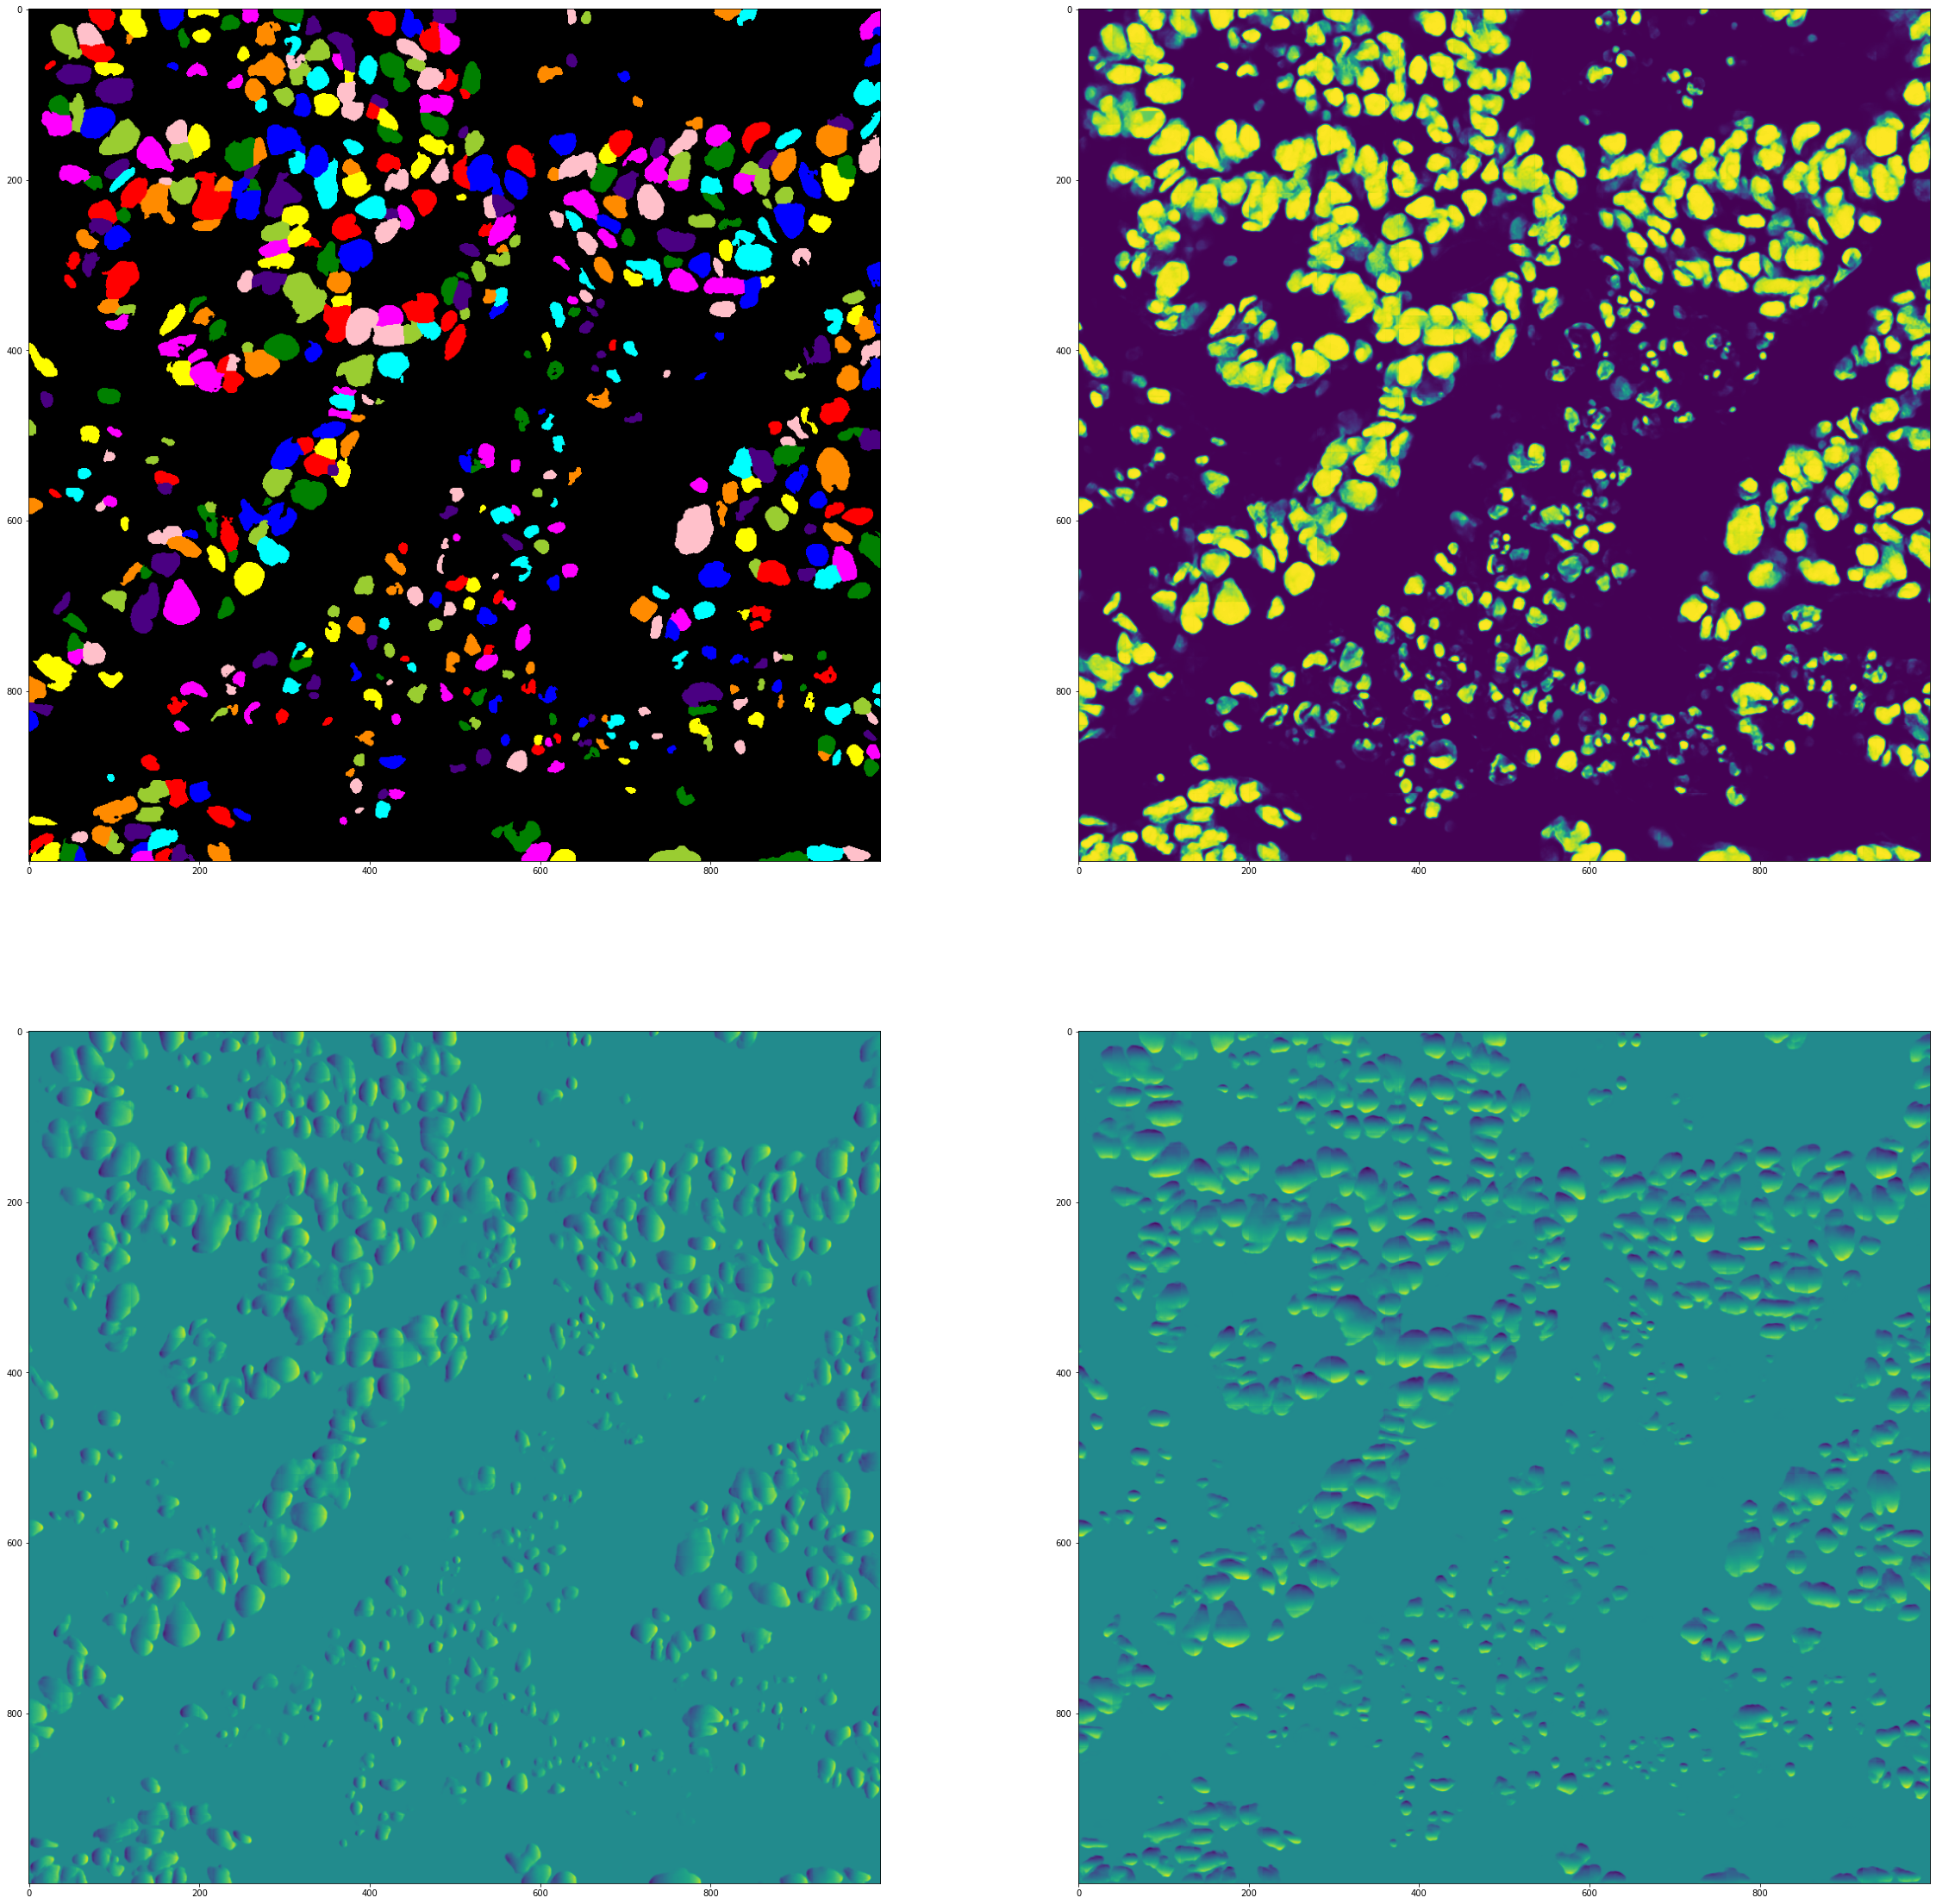

In [6]:
import matplotlib.pyplot as plt
from skimage.color import label2rgb

fig, ax = plt.subplots(2, 2, figsize=(40, 40))
ax = ax.flatten()
ax[0].imshow(label2rgb(inferer.inst_maps["test_11"], bg_label=0))
ax[1].imshow(inferer.soft_insts["test_11"][..., 1])
ax[2].imshow(inferer.aux_maps["test_11"][..., 0])
ax[3].imshow(inferer.aux_maps["test_11"][..., 1])

In [7]:
pattern_list = None
binary_scores = inferer.benchmark_insts(pattern_list=pattern_list, file_prefix="testi")
binary_scores

100%|██████████| 1/1 [00:18<00:00, 18.13s/it]


AJI  AJI_plus     DICE2        PQ        SQ  \
name                                                                     
test_11               0.421934  0.503931  0.445963  0.345244  0.725185   
averages_for_the_set  0.421934  0.503931  0.445963  0.345244  0.725185   

                            DQ  inst_recall  inst_precision    splits  \
name                                                                    
test_11               0.476077     0.369545        0.668908  0.565988   
averages_for_the_set  0.476077     0.369545        0.668908  0.565988   

                        merges  
name                            
test_11               0.962649  
averages_for_the_set  0.962649

In [7]:
pattern_list = None
type_scores = inferer.benchmark_types(pattern_list=pattern_list, file_prefix="testi")
type_scores = type_scores[type_scores.index.str.contains("avg")]
type_scores

100%|██████████| 14/14 [00:21<00:00,  1.56s/it]


AJI  AJI_plus     DICE2        PQ  \
name                                                                   
miscellanous_avg_for_the_set  0.000000  0.000000  0.000000  0.000000   
inflammatory_avg_for_the_set  0.388741  0.390280  0.791213  0.447285   
epithelial_avg_for_the_set    0.498297  0.532683  0.452396  0.451622   
spindle_avg_for_the_set       0.332314  0.341751  0.643478  0.337335   

                                    SQ        DQ  inst_recall  inst_precision  \
name                                                                            
miscellanous_avg_for_the_set  0.000000  0.000000     0.000000        0.000000   
inflammatory_avg_for_the_set  0.827529  0.542358     0.607577        0.604201   
epithelial_avg_for_the_set    0.749391  0.599332     0.603784        0.613323   
spindle_avg_for_the_set       0.731315  0.458337     0.438779        0.526590   

                                    splits    merges  
name                                                  
miscellanous_avg_for_the_set  1.059014e-16  0.111675  
inflammatory_avg_for_the_set  1.261684e-01  0.076042  
epithelial_avg_for_the_set    4.718962e-01  0.501946  
spindle_avg_for_the_set       2.137661e-01  0.359365